Student name: Sajin Mohamed Pallikkathodi Erathali

Student id: 23037601

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

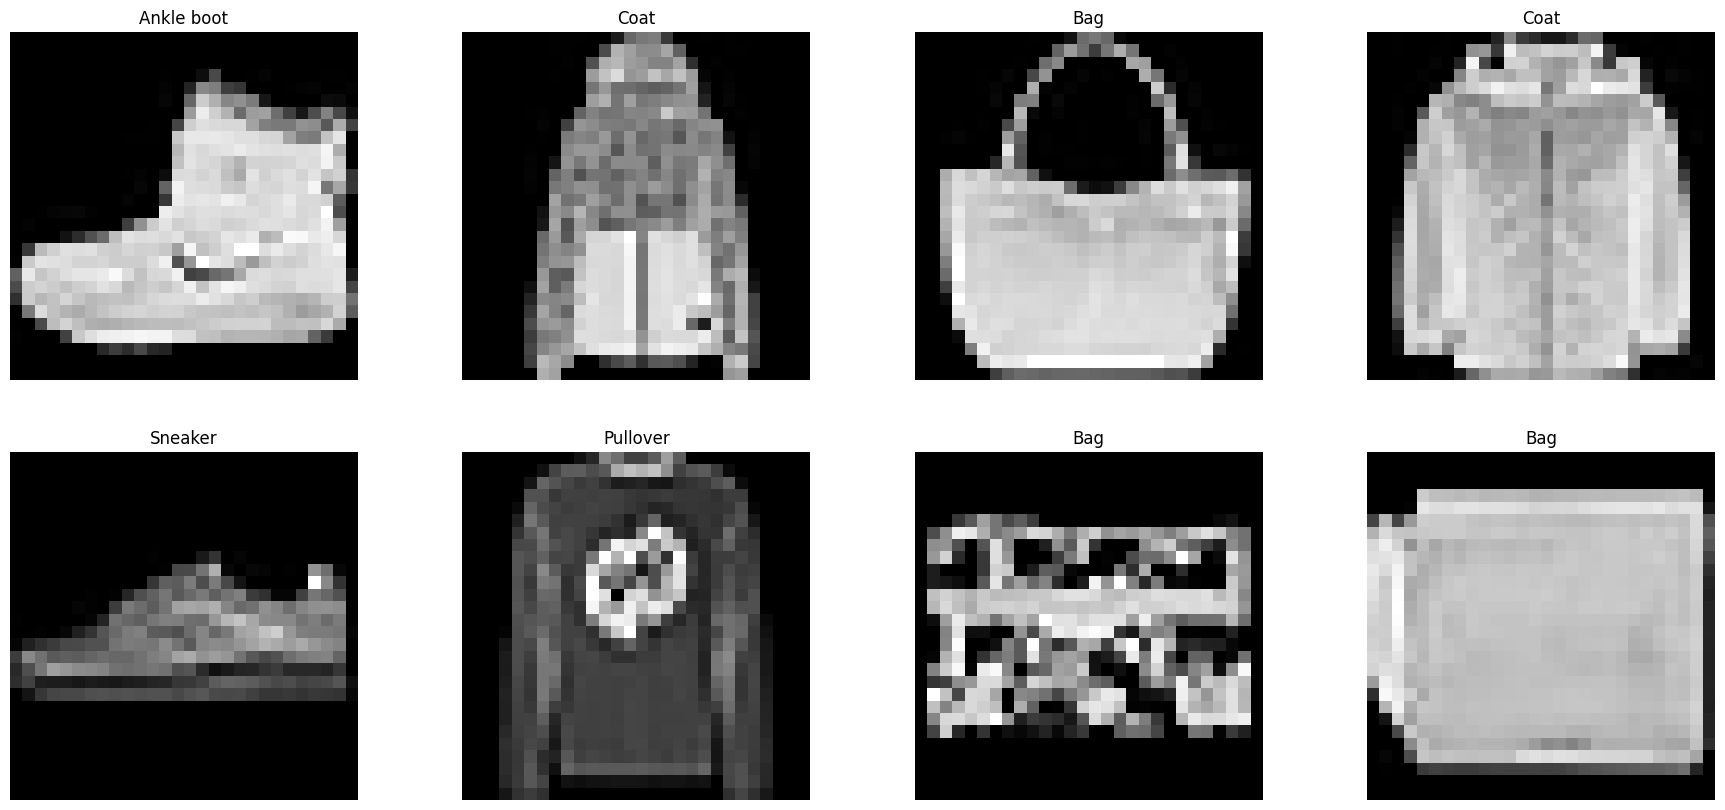

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here

# define standard scaling function
def standardScaleData(X_train, X_test) :
    standardScaler = StandardScaler()
    standardScaled_X_train = standardScaler.fit_transform(X_train)
    standardScaled_X_test = standardScaler.transform(X_test)
    return standardScaled_X_train, standardScaled_X_test
# split data such that 20% is ued for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# call the standard scaling function
standard_scaled_X_train, standard_scaled_X_test = standardScaleData(X_train, X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.linear_model import Perceptron as Perceptron

##################
# Your code here
ppn = Perceptron()
# fit the train data and predict using the test data
train = ppn.fit(standard_scaled_X_train, y_train)
y_pred = ppn.predict(standard_scaled_X_test)
y_pred_train = ppn.predict(standard_scaled_X_train)


In [6]:
from sklearn.metrics import accuracy_score

##################
# Your code here
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("accuracy score of train is :", accuracy_train)
print("accuracy score after prediction with test is :", accuracy_test)



accuracy score of train is : 0.8257142857142857
accuracy score after prediction with test is : 0.8115714285714286


Discuss the result, does it seem good or bad?  
<span style="color:green">The accuracy score of test and train are not too different, indicating that the model does not go towards overfitting, however the accuracy score is only near 80% which does not do a good classification. Hence its not a good model since only 81% of the data is classified correctly.</span>  

Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?).

<span style="color:green">The cell below shows the classifications marked incorrect in red(Prediction) and the expected(Actual) in black where the expected results different from the predicted results. It also shows a dataframe with the y_pred(predicted) and the expected value(Expected Value). While some of the results do look similar to the missclassified for instance, a pullover looks similar to coat and the sneaker looks similar to ankle boot, which may be mistaken due to their similar shape, there are a few instances where a bag was misclassifed as a shirt and Trouser was misclassified as sandal, which looks nothing of the like.  </span>  


Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.  

<span style="color:green">A multiclass perceptron is as the name suggest can handle classification of multiple classes unlike the binary perceptron where we can only classify two different classes in the output layer. It is an extension of a single perceptron where in we have multiple output classes as shown below.</span>   

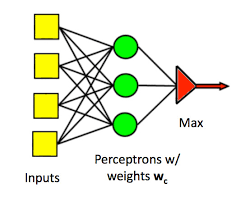

<span style="color:green">Here each perceptron is trained to output one class, for instance, if we need to classify numbers 0-9 we would need 10 different perceptrons. Assuming that the classes are not overlapping and lineary separable each perceptron should return one value. Unlike the binary perceptron where we have only a single output neuron, here we have multiple multiple output neurons. Also unlike the single layer perceptron which provides outputs like 0 and 1, here the activation function used quite often is Softmax, which helps normalize the output values into probability distribution over all the classes.</span>

<span style="color:green">Here multiple strategies could be used such as One-vs-All(OvA) or One-vs-One(OvO). In OvA each class is considered as a binary classification problem over all other classes. If we have 'k' classes, k different binary classifiers are trained, where each classifier belongs to one class and the sample belonging to the required class are marked as positive and the remaining as negative. Once the classfiers are trained the one with the highest output score among all the classifiers are chosen as the predicted class.</span>

<span style="color:green">While this approach is easy to implement and is efficient, it can be extremely sensitive to class imbalance.</span>

<span style="color:green">In OvO, unlike the OvA which divides the data into individual binary datasets for each class, the one-vs-one approach segments the dataset into separate datasets for each class in comparison to every other class. Hence here we have K * (K - 1) / 2 classifiers. While this is computationally expensive it helps distinguish complex relationships between classes.</span>

<span style="color:green">The working of perceptron could be defined as starting with weight 0 and make a prediction with the current weight vector. This prediction will be   </span>

<span style="color:green">y = argmaxy w.f(x)  </span>

<span style="color:green">which can be read as argmax over all the labels of the dot product between the weight vector and the feature vector we have. Since here we have multiple weight vectors we update the weight vector that are involved in the error. If the prediction is correct then do not update else lower the score of the wrong answer and raise the score of the right answer.

 </span>   



## Use the same plot function given above and plot the images where index is chosen from those entries where the y_pred is not equal to y_test and index is in the range of 1-100.

,y_pred,Expected value
0,Pullover,Shirt
1,Coat,Shirt
2,Coat,Pullover
3,Shirt,T-shirt/top
4,Shirt,Bag
5,Coat,Pullover
6,Shirt,T-shirt/top
7,Shirt,Pullover
8,Shirt,Coat
9,Sandal,Trouser


[5, 7, 11, 12, 13, 23, 26, 35, 54, 57, 64, 78, 86, 87, 92, 94, 98, 100]


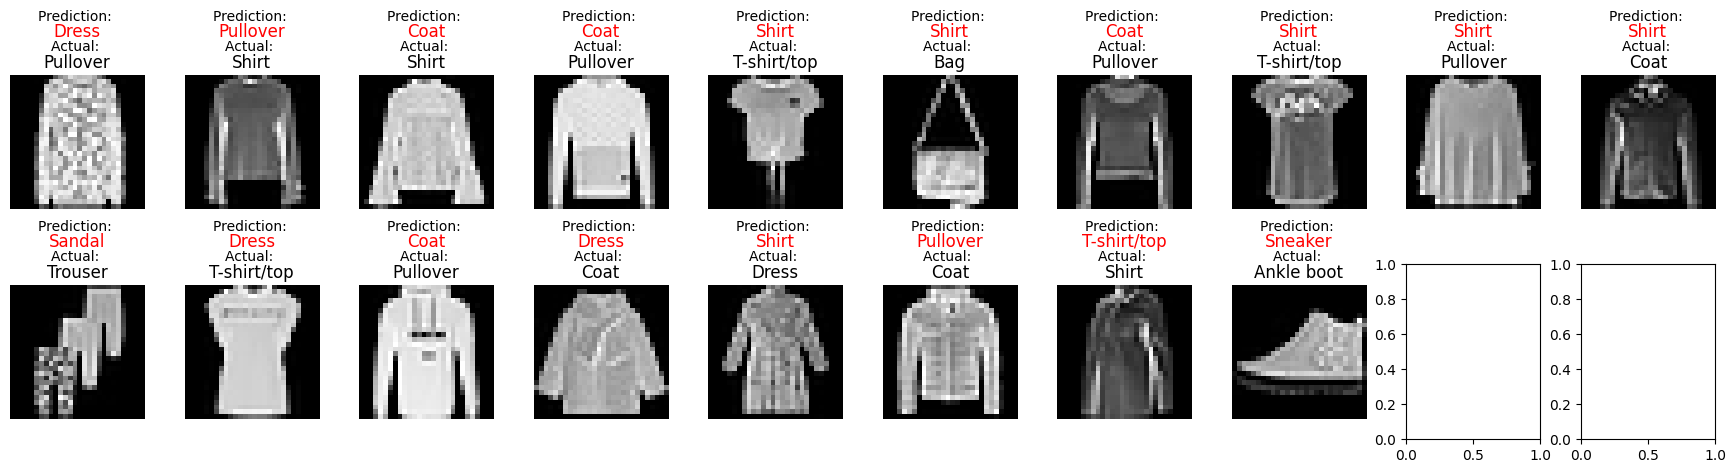

In [7]:
import pandas as pd

index = [i for i in range(1, 101) if y_pred[i] != y_test[i]]
values = []

for i in range(1, len(index)) :
  values.append([text_labels[int(y_pred[index[i]])], text_labels[int(y_test[index[i]])]])

df = pd.DataFrame(values, columns = ['y_pred', 'Expected value'])
display(df)

np.set_printoptions(linewidth=320)

# Visualize the image
fig, ax = plt.subplots(2, 10, figsize=(22, 5))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

print(index)

for i in range(len(index)):
    # Separate parts of the title with different colors
    prediction = "Prediction: "
    pred_value = text_labels[int(y_pred[index[i]])]
    actual = "Actual: "
    actual_value = text_labels[int(y_test[index[i]])]

    ax[i].imshow(np.reshape(X_test[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis

    # Display text with different colors
    ax[i].text(0.5, 1.40, prediction, transform=ax[i].transAxes, color='black', fontsize=10, ha='center')
    ax[i].text(0.5, 1.28, pred_value, transform=ax[i].transAxes, color='red', fontsize=12, ha='center')
    ax[i].text(0.5, 1.18, actual, transform=ax[i].transAxes, color='black', fontsize=10, ha='center')
    ax[i].text(0.5, 1.05, actual_value, transform=ax[i].transAxes, color='black', fontsize=12, ha='center')



plt.show()


<font color='red'>Enter your text here</font>

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [8]:
from sklearn.neural_network import MLPClassifier
import time

#######################
# Your code here

# mlpclassifier with alpha 0.1 and hidden layer with 20 neurons
model = MLPClassifier(alpha = 0.1, verbose = 1, random_state = 42, hidden_layer_sizes = (20,))
start_time = time.time()
# training the model with scaled data
model = model.fit(standard_scaled_X_train, y_train)
y_pred_MLP = model.predict(standard_scaled_X_test)

end_time = time.time()
print("total time take is :", end_time - start_time)



Iteration 1, loss = 0.65226459
Iteration 2, loss = 0.43831608
Iteration 3, loss = 0.40226257
Iteration 4, loss = 0.38179829
Iteration 5, loss = 0.36728105
Iteration 6, loss = 0.35776215
Iteration 7, loss = 0.34954336
Iteration 8, loss = 0.34104124
Iteration 9, loss = 0.33694452
Iteration 10, loss = 0.33222178
Iteration 11, loss = 0.32780911
Iteration 12, loss = 0.32387997
Iteration 13, loss = 0.31965706
Iteration 14, loss = 0.31811203
Iteration 15, loss = 0.31457335
Iteration 16, loss = 0.31268883
Iteration 17, loss = 0.31055972
Iteration 18, loss = 0.30676419
Iteration 19, loss = 0.30477562
Iteration 20, loss = 0.30436365
Iteration 21, loss = 0.30079397
Iteration 22, loss = 0.29982949
Iteration 23, loss = 0.29793866
Iteration 24, loss = 0.29666269
Iteration 25, loss = 0.29636652
Iteration 26, loss = 0.29343013
Iteration 27, loss = 0.29297305
Iteration 28, loss = 0.29330393
Iteration 29, loss = 0.29037594
Iteration 30, loss = 0.28942154
Iteration 31, loss = 0.28910554
Iteration 32, los

In [9]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
y_pred_train_MLP = model.predict(standard_scaled_X_train)
print("accuracy score for train", accuracy_score(y_pred_train_MLP, y_train))
print("accuracy score for test after MLP is ", accuracy_score(y_pred_MLP, y_test))

accuracy score for train 0.9312142857142857
accuracy score for test after MLP is  0.8692142857142857


#### Questions: (answer here)

1. What is the size of the input layer here? Explain  
    <span style="color:green">
    The size of the input layer would be the number of features + 1(bias). Since we are trying to create a model which takes input nuerons x1,x2,x3 etc and create an output of classfier, each of the features are associated with one of the neuerons in the input layer. Hence the size of the input layer here would be 784 + 1 = 785.
    </span>
2. What is the size of the output layer here? Explain  
    <span style="color:green">
    The size of the output layer would be the number of distinct outputs that we can observe from the classifier. Since we are trying to create a model which takes input nuerons x1,x2,x3 etc and create an output of classfier as y1, y2, y3 etc. based on the weights that gets assigned and backpropogated which alters the weights again, each of the features are associated with one of the neuerons in the input layer and the output layer would provide the different classfiications. Hence the size of the output layer here would be 10.
    </span>

3. How many weights in total does the algorithm learn?  
    <span style="color:green">
    The following shows the calculation of weights :</span>

    <span style="color:green">We need connections from the input layer 784 to the 1st hidden layer(Layer 1) where we have 20 nodes.  
    Hence we have 784 + 1(bias) * 20 = 15700.  
    Here we have 15700 weights for the first layer.  

    <span style="color:green">Now for the output layer we have 10 outputs and the 20 nodes + 1 bias as the input for the output layer of 10.
    Hence we have 21 * 10 = 210</span>

    <span style="color:green">Since we have only one hidden layer. We get the total number of weights as 15700 + 210 = 15910
    </span>

4. What does it mean that the training accuracy and the test accuracy are different?  
    <span style="color:green">
    If the test accuracy and training accuracy are different then that means the model is not performing well. ie. the model is overfitting. The generalization of the model is not good for the test and it cannot perform well beyond the train set as it has coupled or tightly bound the predictions with the training set. Here we observe a training accuracy of 93.12% and the test accuracy is 86.92%. This is a considerable difference in the train and the test accuracy, which tells us that the model is overfitting.
    </span>

<font color='red'>Enter your text here</font>

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)


# defining a method to be called later as well where it takes widths as a parameter and iterate through them as hidden layer sizes
def MLPClassification(widths) :
  for width in widths :

    model = MLPClassifier(alpha = 0.001, verbose = 1, random_state = 42, hidden_layer_sizes = width)

    start_time = time.time()
    model.fit(standard_scaled_X_train, y_train)
    y_pred_MLP_train = model.predict(standard_scaled_X_train)
    y_pred_MLP_test = model.predict(standard_scaled_X_test)
    end_time = time.time()
    print(f"total time taken with width of {width} is :", end_time - start_time)

    a_train.append(accuracy_score(y_pred_MLP_train, y_train))
    a_test.append(accuracy_score(y_pred_MLP_test, y_test))

    print(f"accuracy score for test after MLP with width {width} is :", accuracy_score(y_pred_MLP_test, y_test), "\n")

MLPClassification(widths)


Iteration 1, loss = 0.63768093
Iteration 2, loss = 0.42186738
Iteration 3, loss = 0.38505507
Iteration 4, loss = 0.36320714
Iteration 5, loss = 0.34776936
Iteration 6, loss = 0.33752283
Iteration 7, loss = 0.32765729
Iteration 8, loss = 0.31820919
Iteration 9, loss = 0.31283792
Iteration 10, loss = 0.30666357
Iteration 11, loss = 0.30103009
Iteration 12, loss = 0.29581097
Iteration 13, loss = 0.29107102
Iteration 14, loss = 0.28758881
Iteration 15, loss = 0.28310182
Iteration 16, loss = 0.28046436
Iteration 17, loss = 0.27554454
Iteration 18, loss = 0.27133785
Iteration 19, loss = 0.26812727
Iteration 20, loss = 0.26686857
Iteration 21, loss = 0.26326890
Iteration 22, loss = 0.26050504
Iteration 23, loss = 0.25761600
Iteration 24, loss = 0.25533508
Iteration 25, loss = 0.25338964
Iteration 26, loss = 0.25018118
Iteration 27, loss = 0.24783313
Iteration 28, loss = 0.24762115
Iteration 29, loss = 0.24471216
Iteration 30, loss = 0.24275589
Iteration 31, loss = 0.24167374
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


total time taken with width of 20 is : 158.74225282669067
accuracy score for test after MLP with width 20 is : 0.8561428571428571 

Iteration 1, loss = 0.53058954
Iteration 2, loss = 0.36926258
Iteration 3, loss = 0.33345078
Iteration 4, loss = 0.31272977
Iteration 5, loss = 0.29222041
Iteration 6, loss = 0.27538962
Iteration 7, loss = 0.26556782
Iteration 8, loss = 0.25349900
Iteration 9, loss = 0.24353786
Iteration 10, loss = 0.23633731
Iteration 11, loss = 0.22741760
Iteration 12, loss = 0.21934180
Iteration 13, loss = 0.21059862
Iteration 14, loss = 0.20436920
Iteration 15, loss = 0.19945165
Iteration 16, loss = 0.19885518
Iteration 17, loss = 0.18604288
Iteration 18, loss = 0.18240970
Iteration 19, loss = 0.17911015
Iteration 20, loss = 0.17443228
Iteration 21, loss = 0.16871674
Iteration 22, loss = 0.16471613
Iteration 23, loss = 0.16250030
Iteration 24, loss = 0.15907946
Iteration 25, loss = 0.15617963
Iteration 26, loss = 0.15053497
Iteration 27, loss = 0.14636146
Iteration 28,

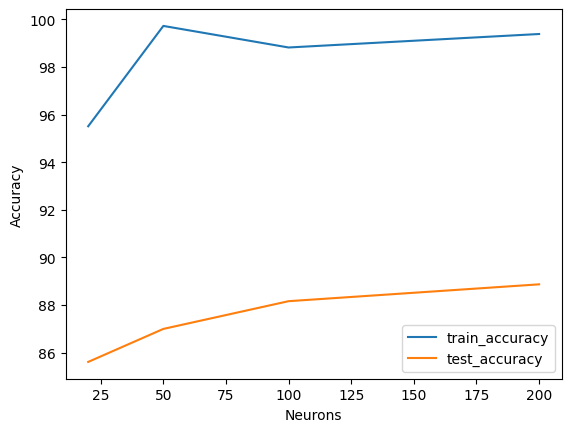

In [12]:
import matplotlib.pyplot as plt
# 88.9
########################
# Your plot of training and test accuracy here
def Plot_train_test_accuracy(widths) :

  a_train_percentages = np.array(a_train) * 100
  a_test_percentages = np.array(a_test) * 100

  plt.plot(np.array(widths), a_train_percentages, label = 'train_accuracy')
  plt.plot(np.array(widths), a_test_percentages, label = 'test_accuracy')
  plt.xlabel("Neurons")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

Plot_train_test_accuracy(widths)


Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.  
  <span style="color:green">
  As the count of neurons increase the time taken to train and predict does increase as shown above. As we can see the time taken for width of 20 is only 158 seconds but the time taken for 50 neurons is over 200 seconds, similarly for 100 it rose to 301 seconds. This is expected as more neurons are added into the hidden layer the number of weights trained increases hence the time would also increase subsequently.  
  </span>

2. What can you infer from the graph?  
  <span style="color:green">
  The graph shows that the model does not perform well and is prone to overfitting as the maximum test accuracy obtained is around 88 percent and the train accuracy is close to 100 percent through out as that is the data on which it trains on. Even though the accuracy seems to rise from 20 neurons in the hidden layer to a 100 nuerons rapidly, it soon attains a saturation at 88 percent for the test accuracy. Even the training accuracy increases and falls off. Hence I would pick the best value for the number of neurons to be 200 as we do not see much of an increase from there.</span>  

<span style="color:green">
  When the hidden layer is 20.  
  The total number of weights learned = 784+1(bias) * 20 + 20+1(bias) * 10 = 15910


  When the hidden layer is 50.  
  The total number of weights learned = 784+1(bias) * 50 + 50+1(bias) * 10= 39250 + 510 = 39760

  When the hidden layer is 100.  
  The total number of weights learned = 784+1(bias) * 100 + 100+1(bias) * 10= 78500 + 1010 = 79510

  When the hidden layer is 200.  
  The total number of weights learned = 784+1(bias) * 200 + 200+1(bias) * 10= 78500 + 1010 = 157000 + 2010 = 159010

  
  There is definitely Overfitting in this model as there is a wide margin between the train and the test data. Overfitting can be reduced by increasing the regularization parameters like alpha. Here we have the value as 0.001 which is a weak regularization compared to the data on which we are working. Hence, increasing the value of alpha would result in a better model. Also removing redundant features using PCA might also help. Apart from hyperparameter tuning, early stopping is something that can be implemented in order for the model not to learn noises.
  </span>.
For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [15]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(100,100,50), (200,200,200))

# reinitializing for using in the method by clearing the previous results
a_test = []
a_train = []

MLPClassification(layers)


Iteration 1, loss = 0.68641222
Iteration 2, loss = 0.41385284
Iteration 3, loss = 0.37735658
Iteration 4, loss = 0.35405532
Iteration 5, loss = 0.33790710
Iteration 6, loss = 0.32443585
Iteration 7, loss = 0.31579026
Iteration 8, loss = 0.30600021
Iteration 9, loss = 0.30041728
Iteration 10, loss = 0.29316937
Iteration 11, loss = 0.28733311
Iteration 12, loss = 0.28185715
Iteration 13, loss = 0.27706735
Iteration 14, loss = 0.27249645
Iteration 15, loss = 0.26988442
Iteration 16, loss = 0.26399902
Iteration 17, loss = 0.26114286
Iteration 18, loss = 0.25529437
Iteration 19, loss = 0.25465101
Iteration 20, loss = 0.25096836
Iteration 21, loss = 0.24727276
Iteration 22, loss = 0.24459265
Iteration 23, loss = 0.24253518
Iteration 24, loss = 0.23939387
Iteration 25, loss = 0.23573086
Iteration 26, loss = 0.23433618
Iteration 27, loss = 0.23332093
Iteration 28, loss = 0.22887060
Iteration 29, loss = 0.22729109
Iteration 30, loss = 0.22432451
Iteration 31, loss = 0.22366715
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


total time taken with width of (20, 20) is : 178.74148392677307
accuracy score for test after MLP with width (20, 20) is : 0.8607857142857143 

Iteration 1, loss = 0.75693539
Iteration 2, loss = 0.41666590
Iteration 3, loss = 0.37583115
Iteration 4, loss = 0.35235133
Iteration 5, loss = 0.33756861
Iteration 6, loss = 0.32414899
Iteration 7, loss = 0.31406333
Iteration 8, loss = 0.30680972
Iteration 9, loss = 0.29924285
Iteration 10, loss = 0.29372782
Iteration 11, loss = 0.28567317
Iteration 12, loss = 0.27995070
Iteration 13, loss = 0.27625912
Iteration 14, loss = 0.27111772
Iteration 15, loss = 0.26574661
Iteration 16, loss = 0.26196941
Iteration 17, loss = 0.25817801
Iteration 18, loss = 0.25480782
Iteration 19, loss = 0.25005755
Iteration 20, loss = 0.24844659
Iteration 21, loss = 0.24594519
Iteration 22, loss = 0.24254068
Iteration 23, loss = 0.23895219
Iteration 24, loss = 0.23594128
Iteration 25, loss = 0.23279930
Iteration 26, loss = 0.22980251
Iteration 27, loss = 0.22886421
I

[(20, 20) (20, 20, 20) (50, 20) (100, 100, 50) (200, 200, 200)]


<ipython-input-16-e515dfac066a>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(layers))


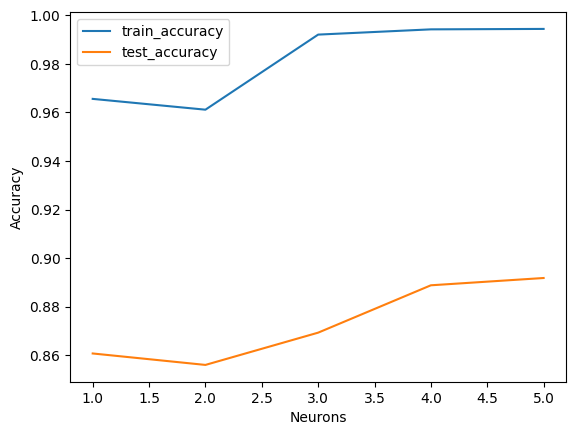

In [16]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here

print(np.array(layers))
x_values_train = np.arange(1, len(a_train) + 1)
x_values_test = np.arange(1, len(a_test) + 1)


plt.plot(x_values_train, a_train, label = 'train_accuracy')
plt.plot(x_values_test, a_test, label = 'test_accuracy')
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### Questions

What can you infer from the graph? (answer in the text box here).

<span style="color:green">The graph shows a better result compared to the previous graph, as the gap between the training and test accuracy has reduced and both the training and test accuracy is increasing without having the fall like in the previous graph. Hence having a deeper network network works well with this scenario rather than having a single hidden layer as this would involve higher level of complexity due to training of a lot of other weights and thereby increasing the accuracy.  
For instance the number of weights trained with multiple hidden layers such as (20,20) layers is 16330, however, the number of weights trained with single hidden layer (20) is only 15910. Here the test accuracy has increased close to 90%.</span>

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?  

<span style="color:green">As we increase the number of layers of the neurons we can find the results improving, but as per this data there is no considerable improvement if we use a deeper network with fewer neurons in each layer(looking at (20) vs (20,20), here the multiple hidden layers would mean additional neurons). But theoretically, depending on the weights assigned to each of the features, the model should be able to learn complex structures and produce a better hypothesis. The successive layers should be able to work on the outputs of the previous layers to produce more accurate results by computing even more complex functions.</span>  

* How many weights did I need to train?

<span style="color:green">
when Hidden Layer is (20,20)
Total number of weights trained are : 784+1(bias)*20 + 20+1(bias)*20 + 20+1(bias) * 10 = 16330


when Hidden Layer is (20,20, 20)
Total number of weights trained are : 784+1(bias)*20 + 20+1(bias)*20 + 20+1(bias)*20 + 20+1(bias) * 10 + = 16750

when Hidden Layer is (50,20)
Total number of weights trained are : 784+1(bias)*50 + 50+1(bias)*20 + 20+1(bias) * 10 = 40480

when Hidden Layer is (100, 100, 50)
Total number of weights trained are : 784+1(bias)*100 + 100+1(bias)*100 + 100+1(bias)*50 + 50+1(bias) * 10   = 94160


when Hidden Layer is (200, 200, 200)
Total number of weights trained are : 784+1(bias)*200 + 200+1(bias)*200 + 200+1(bias)*200 + 200+1(bias) * 10   = 239410
</span>

<font color='red'>Enter your text here</font>

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

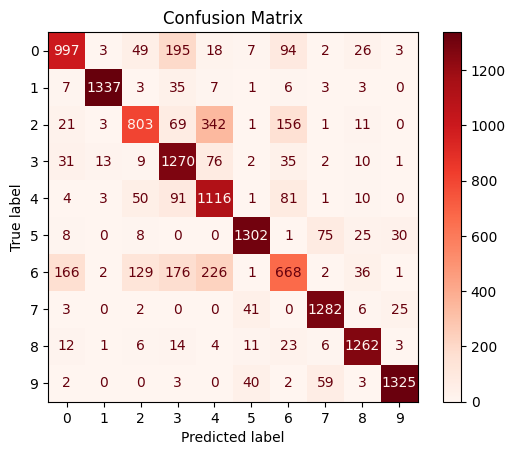

In [17]:
########################
# Your code here

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plotConfusionMatrix(test_Y, y_pred, labels) :

    # Displaying the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix.plot(cmap=plt.cm.Reds) # changing the color from the default to red inorder for a better visualization
    plt.title("Confusion Matrix")
    plt.show()
plotConfusionMatrix(y_test, y_pred, model.classes_)


<font color='red'>Enter your text here</font>

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

<span style="color:green">Class 0 (T-shirt/top) is mostly confused with Class 6(Shirt) which is a reasonable confusion as its difficult to deduce which is T-shirt and which is a shirt from the data we have. Similarly the Pullover class 2 is confused with the class 6 which is a shirt, however more than this its predicted as class 4 which is coat. This is also a understandable confusion, like the confusion of class 3(Dress) with the class 0(T-shirt) and class 6(Shirt). However, the class 9(Ankle boots) and class 8(Bag) is not confused with any other classes as often as other classes.</span>

<span style="color:green">Interestingly, class 7(Sneaker) is a class that is predicted overall well and its confused with class 5 (Sandal) more often than class 9(Ankle boot).</span>